Box(children=(Box(children=(Label(value=u'Leak Channel (gl_hh)', layout=Layout(width=u'195px')), FloatText(value=2e-05, layout=Layout(width=u'100px')))), Box(children=(Label(value=u'Sodium Channel (gnabar_hh)', layout=Layout(width=u'195px')), FloatText(value=0.0, layout=Layout(width=u'100px')))), Box(children=(Label(value=u'Potassium Channel (gkbar_hh)', layout=Layout(width=u'195px')), FloatText(value=0.0, layout=Layout(width=u'100px')))), Box(children=(Label(value=u'Current Injection Amplitude (nA)', layout=Layout(width=u'195px')), FloatText(value=1.0, layout=Layout(width=u'100px'))))), layout=Layout(align_items=u'initial', display=u'flex', flex_flow=u'column', width=u'295px'))

HBox(children=(Button(button_style=u'info', description=u'Run Model', style=ButtonStyle()), Button(button_style=u'warning', description=u'Clear Output', style=ButtonStyle())))

<IPython.core.display.Javascript object>


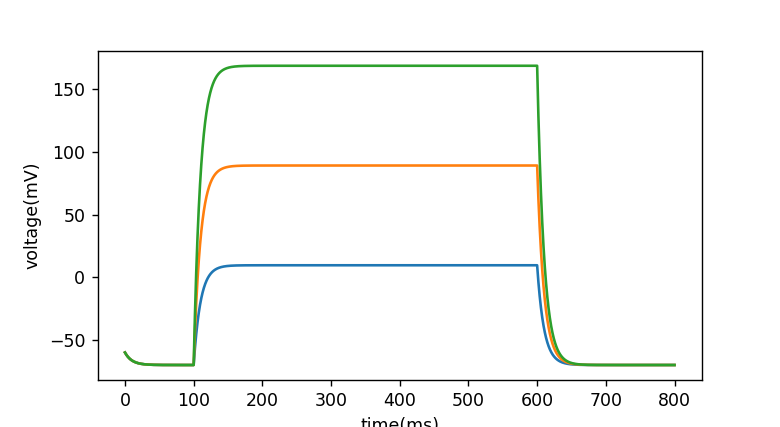

In [1]:
from neuron import h
from IPython.display import display, clear_output
from ipywidgets import Layout, Button, Box, FloatText, Textarea, Dropdown, Label, IntSlider, HBox
%matplotlib nbagg
import matplotlib.pyplot as plt
import Passive_Main
h.load_file('stdrun.hoc')

# Create input text boxes and buttons for users
gna_hh = FloatText(value=0, layout=Layout(width='100px'))
gk_hh = FloatText(value=0, layout=Layout(width='100px'))
gl_hh = FloatText(value=2.0e-5, layout=Layout(width='100px'))
cur_inj = FloatText(value=1, layout=Layout(width='100px'))
run_button = Button(description="Run Model", button_style='info')
clear_button = Button(description="Clear Output", button_style='warning')

# Use a form to hold the Labels and Input Boxes 
form_items = [
    Box([Label(value='Leak Channel (gl_hh)', layout=Layout(width='195px')), gl_hh]),
    Box([Label(value='Sodium Channel (gnabar_hh)', layout=Layout(width='195px')), gna_hh]),
    Box([Label(value='Potassium Channel (gkbar_hh)', layout=Layout(width='195px')), gk_hh]),
    Box([Label(value='Current Injection Amplitude (nA)', layout=Layout(width='195px')), cur_inj]),
    ]

# Define the parameters of the form_items
form = Box(form_items, layout=Layout(
    display='flex',
    flex_flow='column',
    align_items='initial',
    width='295px'
))
# Display form and buttons

display(form, HBox([run_button, clear_button]))
#display(HBox([f]))
plt.figure
# Define functions that run when the user clicks a button
def run_button_clicked(b):
    t,v=Passive_Main.run_simulation(gl_hh.value, gna_hh.value, gk_hh.value, cur_inj.value)
    plt.plot(t,v)
    plt.xlabel('time(ms)')
    plt.ylabel('voltage(mV)')
    plt.show()
    
    
def clear_button_clicked(b):
    plt.clf()
    
    
run_button.on_click(run_button_clicked)
clear_button.on_click(clear_button_clicked)
